# Slot Simulation

While researching about slot machines, I found  a book titled Casino Operations Management 1998 edition which showed a PAR sheet from 1987. PAR sheet is a documentation which depicts the possible outcomes from the play of slot machine.  

According to Google, the  average RTP (Return to Player) for online slot machine is around 96% while the most physical machines are set around 85 to 95% payout.

The book showed breakdown of the distribution of the expanded reel strip but not the physical reel strip. Out of curiosity, I wanted to check whether the physical reel strip (depicted in bottom left of the image) distribution made sense.

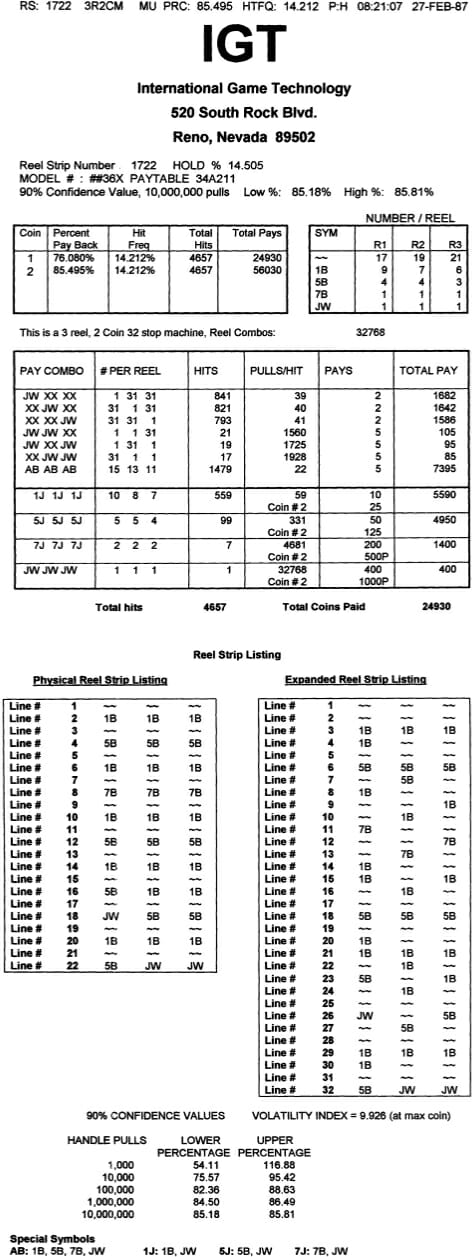

To understand the ideal RTP and win percentages, simulation of the 32 line slot machine should be ran and we can compare our findings to the given data. 

This first simulation represents the 1 coin plays on the expanded reel strip machines.

In [1]:
import random
import string 
class SlotMachine:
    def __init__(self,reelNum, winDict):
        self.reels=[list(string.ascii_uppercase[:26]+string.ascii_lowercase[:6])] *reelNum
        self.wins=winDict
    def spin(self):
        spinResult = ''
        for reel in self.reels:
            spinResult += str(random.choice(reel))
        return spinResult
    def simulation(self, spinCount, potAmt, betAmt):
        self.spinCount, self.potAmt, self.betAmt=spinCount, potAmt, betAmt
        jackpot=0
        startingpot=potAmt
        totalPaid=0
        winningSpins=0
        for i in range(self.spinCount):
            potAmt+= betAmt
            currSpin=self.spin()
            hits=[item for item in self.wins.keys() if item in currSpin]
            if hits:
                multiplier = self.wins[max(hits)]
                payout = (betAmt*multiplier)
                potAmt -= payout
                totalPaid += payout
                winningSpins += 1
                if multiplier == self.wins[max(self.wins.keys())]:
                    jackpot += 1
        returnToPlayer = float(f"{totalPaid / (betAmt * spinCount)}")
        profit = potAmt - startingpot

        if totalPaid == 0:
            profit = f"${float(profit):,.2f}"
            return f"{winningSpins} wins/{spinCount} spins.  Simulated profit: {profit}. RTP: 0.0"
        if profit > 0:
            profit = f"${float(profit):,.2f}"
            return f"{winningSpins} wins/{spinCount} spins.  Simulated profit: {profit}.  RTP: {returnToPlayer:.2f}"
        elif profit < 0:
            profit = f"${float(profit):,.2f}"
            #profit = str(profit).replace("-", "-$")
            return f"{winningSpins} wins/{spinCount} spins.  Simulated profit: {profit}. RTP: {returnToPlayer:.2f}"
        else:
            return f"{winningSpins} wins/{spinCount} spins.  Simulated profit: {profit}. RTP: {returnToPlayer:.2f}"


In [2]:
import itertools

points_400= {"AAA":400}
combo_200 = [''.join(candidate) for candidate in itertools.product('AB', 'AB', 'AB')]
points_200 = {combo: 200 for combo in combo_200}
combo_50 = [''.join(candidate) for candidate in itertools.product('ACDEF', 'ACDEF', 'ACDE')]
points_50 = {combo: 50 for combo in combo_50}
combo_10 = [''.join(candidate) for candidate in itertools.product('AGHIJKLMNO', 'AGHIJKLM', 'AFGHIJK')]
points_10 = {combo: 10 for combo in combo_10}
combo_5a = [''.join(candidate) for candidate in itertools.product('ABCDEFGHIJKLMNO', 'ABCDEFGHIJKLM', 'ABCDEFGHIJK')]
points_5a = {combo: 5 for combo in combo_5a}
combo_5b = ['AA' + letter for letter in 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdef']
points_5b = {combo: 5 for combo in combo_5b}
combo_5c = ['A' + letter + 'A' for letter in 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdef']
points_5c = {combo: 5 for combo in combo_5c}
combo_5d = [letter + 'AA'  for letter in 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdef']
points_5d = {combo: 5 for combo in combo_5d}

combo_2a = ['A{}{}'.format(second_letter, third_letter) for second_letter in 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdef' for third_letter in 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdef']
points_2a = {combo: 2 for combo in combo_2a}
combo_2b = ['{}A{}'.format(first_letter, third_letter) for first_letter in 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdef' for third_letter in 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdef']
points_2b = {combo: 2 for combo in combo_2b}
combo_2c = ['{}{}A'.format(first_letter, second_letter) for first_letter in 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdef' for second_letter in 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdef']
points_2c = {combo: 2 for combo in combo_2c}

In [3]:
pointsdict = {}
dictionaries_to_update = [points_2a, points_2b, points_2c, points_5a, points_5b, points_5c, points_5d, points_10, points_50, points_200, points_400]

for dictionary in dictionaries_to_update:
    pointsdict.update(dictionary)


slot1 = SlotMachine(3, pointsdict)

print(slot1.simulation(100000,1000000,1))

14336 wins/100000 spins.  Simulated profit: $22,872.00.  RTP: 0.77


This second simulation, slot2, represents 2 coin plays in the expanded reel machine.

In [4]:
import itertools

points_1000= {"AAA":700}
combo_500 = [''.join(candidate) for candidate in itertools.product('AB', 'AB', 'AB')]
points_500 = {combo: 350 for combo in combo_500}
combo_125 = [''.join(candidate) for candidate in itertools.product('ACDEF', 'ACDEF', 'ACDE')]
points_125 = {combo: 82.5 for combo in combo_125}
combo_25 = [''.join(candidate) for candidate in itertools.product('AGHIJKLMNO', 'AGHIJKLM', 'AFGHIJK')]
points_25 = {combo: 17.5 for combo in combo_25}
combo_5a = [''.join(candidate) for candidate in itertools.product('ABCDEFGHIJKLMNO', 'ABCDEFGHIJKLM', 'ABCDEFGHIJK')]
points_5a = {combo: 2.5 for combo in combo_5a}
combo_5b = ['AA' + letter for letter in 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdef']
points_5b = {combo: 2.5 for combo in combo_5b}
combo_5c = ['A' + letter + 'A' for letter in 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdef']
points_5c = {combo: 2.5 for combo in combo_5c}
combo_5d = [letter + 'AA'  for letter in 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdef']
points_5d = {combo: 2.5 for combo in combo_5d}

combo_2a = ['A{}{}'.format(second_letter, third_letter) for second_letter in 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdef' for third_letter in 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdef']
points_2a = {combo: 1 for combo in combo_2a}
combo_2b = ['{}A{}'.format(first_letter, third_letter) for first_letter in 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdef' for third_letter in 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdef']
points_2b = {combo: 1 for combo in combo_2b}
combo_2c = ['{}{}A'.format(first_letter, second_letter) for first_letter in 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdef' for second_letter in 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdef']
points_2c = {combo: 1 for combo in combo_2c}

In [5]:
pointsdict2 = {}
dictionaries_to_update2 = [points_2a, points_2b, points_2c, points_5a, points_5b, points_5c, points_5d, points_25, points_125, points_500, points_1000]

for dictionary in dictionaries_to_update2:
    pointsdict2.update(dictionary)


slot2 = SlotMachine(3, pointsdict2)

print(slot2.simulation(100000,1000000,2))

14231 wins/100000 spins.  Simulated profit: $36,808.00.  RTP: 0.82


By running the simulation for both single coin and two coin plays 100,000 times each, I was able to get the values similar to the ones in the top left chart. Percent payback and the RTP matches the PAR sheet.

Running the simulations helped me understand how to read the PAR sheet. By putting in the second coin, your payout for higher reward is sum of the two values. For example, if you score 3 Joker's Wild, you get the 400 coins for the initial coin and another 1,000 coins for the second coin. One thing to note is that the casinos tend to have a higher RTP for players when they play more coins in each run to incentivize the players to increase their winning percentage. This will save casinos time to gain their profit.

Knowing that the simulations are working properly, we can try to guess how the 22 physical reel machine would work. For the sake of simplicity, I will assume all the plays were done 1-coin plays and they have same payout as the expanded reel slot machine 1-coin plays. The following will represent the 22 physical reel strip machine.

In [6]:
import random
import string 
class SlotMachine2:
    def __init__(self,reelNum, winDict):
        self.reels=[list(string.ascii_uppercase[:22])] *reelNum
        self.wins=winDict
    def spin(self):
        spinResult = ''
        for reel in self.reels:
            spinResult += str(random.choice(reel))
        return spinResult
    def simulation(self, spinCount, potAmt, betAmt):
        self.spinCount, self.potAmt, self.betAmt=spinCount, potAmt, betAmt
        jackpot=0
        startingpot=potAmt
        totalPaid=0
        winningSpins=0
        for i in range(self.spinCount):
            potAmt+= betAmt
            currSpin=self.spin()
            hits=[item for item in self.wins.keys() if item in currSpin]
            if hits:
                multiplier = self.wins[max(hits)]
                payout = (betAmt*multiplier)
                potAmt -= payout
                totalPaid += payout
                winningSpins += 1
                if multiplier == self.wins[max(self.wins.keys())]:
                    jackpot += 1
        returnToPlayer = float(f"{totalPaid / (betAmt * spinCount)}")
        profit = potAmt - startingpot

        if totalPaid == 0:
            profit = f"${float(profit):,.2f}"
            return f"{winningSpins} wins/{spinCount} spins.  Simulated profit: {profit}. RTP: 0.0"
        if profit > 0:
            profit = f"${float(profit):,.2f}"
            return f"{winningSpins} wins/{spinCount} spins.  Simulated profit: {profit}.  RTP: {returnToPlayer:.2f}"
        elif profit < 0:
            profit = f"${float(profit):,.2f}"
            #profit = str(profit).replace("-", "-$")
            return f"{winningSpins} wins/{spinCount} spins.  Simulated profit: {profit}. RTP: {returnToPlayer:.2f}"
        else:
            return f"{winningSpins} wins/{spinCount} spins.  Simulated profit: {profit}. RTP: {returnToPlayer:.2f}"

In [7]:
import itertools

points_400= {"AAA":400}
combo_200 = [''.join(candidate) for candidate in itertools.product('AB', 'AB', 'AB')]
points_200 = {combo: 200 for combo in combo_200}
combo_50 = [''.join(candidate) for candidate in itertools.product('ACDEF', 'ACDE', 'ACDE')]
points_50 = {combo: 50 for combo in combo_50}
combo_10 = [''.join(candidate) for candidate in itertools.product('AGHIJK', 'AFGHIJK', 'AFGHIJK')]
points_10 = {combo: 10 for combo in combo_10}
combo_5a = [''.join(candidate) for candidate in itertools.product('ABCDEFGHIJK', 'ABCDEFGHIJK', 'ABCDEFGHIJK')]
points_5a = {combo: 5 for combo in combo_5a}
combo_5b = ['AA' + letter for letter in 'ABCDEFGHIJKLMNOPQRSTUV']
points_5b = {combo: 5 for combo in combo_5b}
combo_5c = ['A' + letter + 'A' for letter in 'ABCDEFGHIJKLMNOPQRSTUV']
points_5c = {combo: 5 for combo in combo_5c}
combo_5d = [letter + 'AA'  for letter in 'ABCDEFGHIJKLMNOPQRSTUV']
points_5d = {combo: 5 for combo in combo_5d}

combo_2a = ['A{}{}'.format(second_letter, third_letter) for second_letter in 'ABCDEFGHIJKLMNOPQRSTUV' for third_letter in 'ABCDEFGHIJKLMNOPQRSTUV']
points_2a = {combo: 2 for combo in combo_2a}
combo_2b = ['{}A{}'.format(first_letter, third_letter) for first_letter in 'ABCDEFGHIJKLMNOPQRSTUV' for third_letter in 'ABCDEFGHIJKLMNOPQRSTUV']
points_2b = {combo: 2 for combo in combo_2b}
combo_2c = ['{}{}A'.format(first_letter, second_letter) for first_letter in 'ABCDEFGHIJKLMNOPQRSTUV' for second_letter in 'ABCDEFGHIJKLMNOPQRSTUV']
points_2c = {combo: 2 for combo in combo_2c}



In [8]:
pointsdict3 = {}
dictionaries_to_update3 = [points_2a, points_2b, points_2c, points_5a, points_5b, points_5c, points_5d, points_10, points_50, points_200, points_400]

for dictionary in dictionaries_to_update3:
    pointsdict3.update(dictionary)


slot3 = SlotMachine2(3, pointsdict3)

print(slot3.simulation(100000,1000000,1))

22602 wins/100000 spins.  Simulated profit: $-48,665.00. RTP: 1.49


Currently, our RTP is around 1.45. This doesn't really make sense since the machine is returning more money to the players. This current slot machine simulation will make the casino go out of business. Another thing to note is that the win percentage is much higher than the two simulations we have ran before. The win rate is currently 50% higher than the expanded reel strip.

Some adjustments should be made and for the sake of the exercise, I'll be assuming the 22 slot reel maintains their reel size and the reel distribution, since the image clearly states those two things are what is out in public. Therefore the only other number that can be altered is the payout. 

In [9]:
points_200= {"AAA":200}
combo_50 = [''.join(candidate) for candidate in itertools.product('AB', 'AB', 'AB')]
points_50 = {combo: 50 for combo in combo_50}
combo_20 = [''.join(candidate) for candidate in itertools.product('ACDEF', 'ACDE', 'ACDE')]
points_20 = {combo: 20 for combo in combo_20}
combo_8 = [''.join(candidate) for candidate in itertools.product('AGHIJK', 'AFGHIJK', 'AFGHIJK')]
points_8 = {combo: 8 for combo in combo_8}
combo_3a = [''.join(candidate) for candidate in itertools.product('ABCDEFGHIJK', 'ABCDEFGHIJK', 'ABCDEFGHIJK')]
points_3a = {combo: 3 for combo in combo_3a}
combo_3b = ['AA' + letter for letter in 'ABCDEFGHIJKLMNOPQRSTUV']
points_3b = {combo: 3 for combo in combo_3b}
combo_3c = ['A' + letter + 'A' for letter in 'ABCDEFGHIJKLMNOPQRSTUV']
points_3c = {combo: 3 for combo in combo_3c}
combo_3d = [letter + 'AA'  for letter in 'ABCDEFGHIJKLMNOPQRSTUV']
points_3d = {combo: 3 for combo in combo_3d}

combo_2a = ['A{}{}'.format(second_letter, third_letter) for second_letter in 'ABCDEFGHIJKLMNOPQRSTUV' for third_letter in 'ABCDEFGHIJKLMNOPQRSTUV']
points_2a = {combo: 2 for combo in combo_2a}
combo_2b = ['{}A{}'.format(first_letter, third_letter) for first_letter in 'ABCDEFGHIJKLMNOPQRSTUV' for third_letter in 'ABCDEFGHIJKLMNOPQRSTUV']
points_2b = {combo: 2 for combo in combo_2b}
combo_2c = ['{}{}A'.format(first_letter, second_letter) for first_letter in 'ABCDEFGHIJKLMNOPQRSTUV' for second_letter in 'ABCDEFGHIJKLMNOPQRSTUV']
points_2c = {combo: 2 for combo in combo_2c}

In [10]:
pointsdict4 = {}
dictionaries_to_update4 = [points_2a, points_2b, points_2c, points_3a, points_3b, points_3c, points_3d, points_8, points_20, points_50, points_200]

for dictionary in dictionaries_to_update4:
    pointsdict4.update(dictionary)


slot4 = SlotMachine2(3, pointsdict4)

print(slot4.simulation(100000,1000000,1))

22437 wins/100000 spins.  Simulated profit: $12,501.00.  RTP: 0.87


By lowering the 5 to 3, 10 to 8, and 400 to 200, I decreased the RTP down to 0.87, which is a pretty reasonable number for a slot machine. However, there must be another aspect we need to look into which is the volatility. 

In [11]:
import pandas as pd

data1 = {
    'Net Pay': [1, -1, -4, -9, -49, -199, -399],
    '# of Hits': [28111, 2455, 1536, 559, 99, 7, 1]}
df1 = pd.DataFrame(data1)
total_hits1 = df1['# of Hits'].sum()
df1['Probability'] = df1['# of Hits'] / total_hits1
ev1 = df1['Net Pay'] * df1['Probability']
df1['Expected Value']=sum(ev1)
df1['Net Pay - EV']= df1['Net Pay']-df1['Expected Value']
df1['(Net Pay - EV)^2']= df1['Net Pay - EV']**2
df1['Variance']=df1['Probability']*df1['(Net Pay - EV)^2']
df1

,Net Pay,# of Hits,Probability,Expected Value,Net Pay - EV,(Net Pay - EV)^2,Variance
0,1,28111,0.857880,0.239197,0.760803,0.578822,0.496559
1,-1,2455,0.074921,0.239197,-1.239197,1.535609,0.115049
2,-4,1536,0.046875,0.239197,-4.239197,17.970789,0.842381
3,-9,559,0.017059,0.239197,-9.239197,85.362757,1.456231
4,-49,99,0.003021,0.239197,-49.239197,2424.498499,7.324992
5,-199,7,0.000214,0.239197,-199.239197,39696.257532,8.480035
6,-399,1,0.000031,0.239197,-399.239197,159391.936243,4.864256


In [12]:
print(sum(df1['Variance']))

23.579503651708364


In [13]:
import pandas as pd

data2 = {
    'Net Pay': [1, -1, -2, -7, -14, -49, -199],
    '# of Hits': [8261, 1023, 984, 293, 79, 7, 1]}
df2 = pd.DataFrame(data2)
total_hits2 = df2['# of Hits'].sum()
df2['Probability'] = df2['# of Hits'] / total_hits2
ev2 = df2['Net Pay'] * df2['Probability']
df2['Expected Value']=sum(ev2)
df2['Net Pay - EV']= df2['Net Pay']-df2['Expected Value']
df2['(Net Pay - EV)^2']= df2['Net Pay - EV']**2
df2['Variance']=df2['Probability']*df2['(Net Pay - EV)^2']
df2

,Net Pay,# of Hits,Probability,Expected Value,Net Pay - EV,(Net Pay - EV)^2,Variance
0,1,8261,0.775826,0.147539,0.852461,0.726689,0.563785
1,-1,1023,0.096074,0.147539,-1.147539,1.316847,0.126515
2,-2,984,0.092412,0.147539,-2.147539,4.611926,0.426196
3,-7,293,0.027517,0.147539,-7.147539,51.087320,1.405765
4,-14,79,0.007419,0.147539,-14.147539,200.152872,1.484981
5,-49,7,0.000657,0.147539,-49.147539,2415.480633,1.587938
6,-199,1,0.000094,0.147539,-199.147539,39659.742467,3.724619


In [14]:
print(sum(df2['Variance']))

9.31979860381607


The 22 reel that I created has variance which is a lot lower than than the 32 reel machine. Having a low variance machine has its pros and cons. 


One of the key merits of low variance slots is their ability to provide frequent, but smaller payouts. This consistent stream of wins keeps players engaged and entertained for longer durations, fostering a sense of satisfaction and prolonging their gaming sessions. Additionally, it attracts risk-averse players who prefer a steady, predictable flow of rewards over high-stakes, infrequent wins. This accessibility widens the player base, expanding the casino's clientele.

However, these machines also have their downsides. The smaller payouts, while more frequent, often lack the adrenaline rush and excitement associated with larger jackpots. This could potentially reduce the overall thrill  for some players who seek the adrenaline spike of bigger wins. Moreover, from a casino's perspective, low variance slots might not generate the colossal wins that could captivate the imagination of players and garner their attention, potentially impacting the casino's overall revenue. Also, these low variance machines are time inefficient for the slot casinos since the players will stay there longer playing the games. 

Nonetheless, their importance in the casino realm cannot be understated. Low variance slots serve as a balancing force in the gaming portfolio, catering to a diverse audience with varying risk appetites. They contribute significantly to sustaining player engagement and retention, fostering longer play sessions and encouraging a steady flow of revenue.

Ultimately, the impact of low variance slot machines is pivotal in diversifying the gaming landscape within casinos. Their ability to attract risk-averse players and maintain a steady stream of income, albeit at the cost of smaller individual jackpots, solidifies their role as an essential component of a well-rounded casino floor, catering to a wide spectrum of player preferences.

Researching about low and high variance slots made me curious on what the impact would be if the players knew about the different variance and the RTP for the slot machines. Risk tolerant players will flock towards the high volatility slot machines while risk averse players and players with limited bankroll will walk towards the low variance slots to maximize their time.